<a href="https://colab.research.google.com/github/leo0622nycu/Essay/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 基本資料處理
import pandas as pd
import numpy as np
import os

# 視覺化工具
import matplotlib.pyplot as plt
import seaborn as sns

# 平穩性檢定
from statsmodels.tsa.stattools import adfuller

# 時間序列圖：ACF 和 PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA 模型
from statsmodels.tsa.arima.model import ARIMA

# 模型評估
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSV/Historical_Monthly_Revenue_November_2.csv')
print(df)
print(df.info())

       time  revenue
0    201401    51430
1    201402    46829
2    201403    49956
3    201404    61887
4    201405    60789
..      ...      ...
126  202407   256953
127  202408   250866
128  202409   251873
129  202410   314240
130  202411   276058

[131 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   time     131 non-null    int64
 1   revenue  131 non-null    int64
dtypes: int64(2)
memory usage: 2.2 KB
None


In [4]:
# Step 1: 將 `time` 轉換成日期時間格式 (YYYY-MM)
df['time'] = pd.to_datetime(df['time'], format='%Y%m')

# Step 2: 設定 `time` 為索引
df.set_index('time', inplace=True)

# Step 3: 檢查處理後的資料
print("處理後的資料摘要：")
print(df.info())
print("\n前5筆資料：")
print(df.head())

處理後的資料摘要：
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2014-01-01 to 2024-11-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  131 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB
None

前5筆資料：
            revenue
time               
2014-01-01    51430
2014-02-01    46829
2014-03-01    49956
2014-04-01    61887
2014-05-01    60789


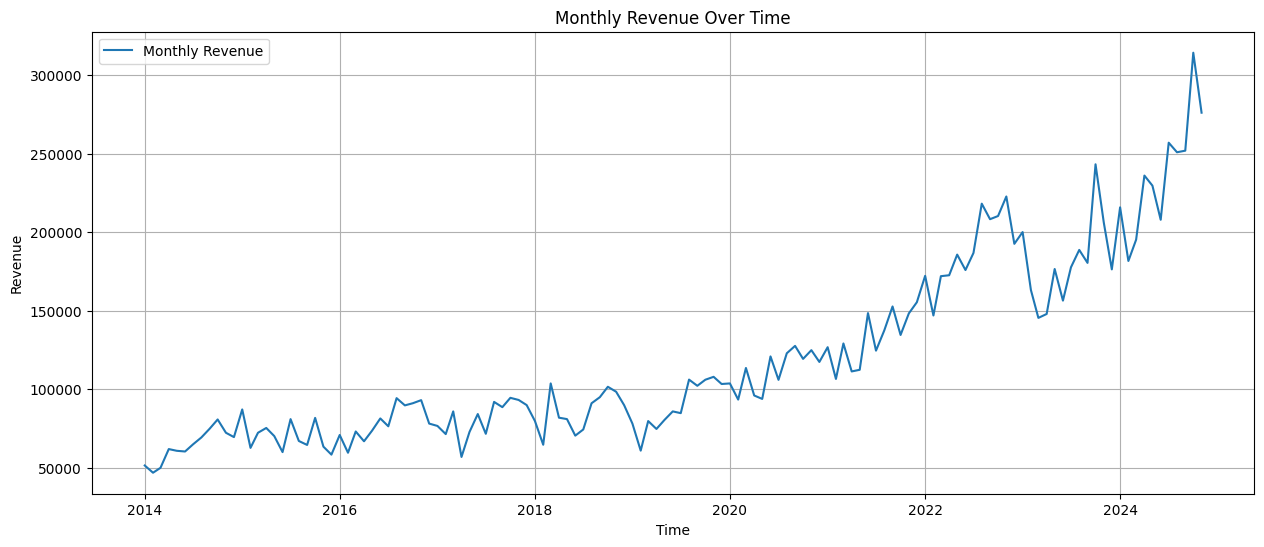

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['revenue'], label='Monthly Revenue', color='tab:blue')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

In [6]:
!pip install pmdarima

from pmdarima import auto_arima

# 提取目標值作為單一序列
y = df['revenue']  # 替換為你的目標值欄位名稱

# 使用 auto_arima 找到最佳參數
model = auto_arima(
    y,
    seasonal=False,      # 如果沒有季節性數據，設為 False
    stepwise=True,       # 啟用步進搜尋以加快速度
    trace=True,          # 打印模型的選擇過程
    error_action='ignore',  # 忽略錯誤繼續搜尋
    suppress_warnings=True  # 禁止警告信息
)

# 打印最佳模型參數
print("最佳 ARIMA 模型參數:")
print(model.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2874.034, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2923.632, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2897.173, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2897.896, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2922.799, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2893.366, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2881.688, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2876.013, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2876.712, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2894.622, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2886.407, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2878.294, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2877.018, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2875.212, Time=0.12 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.090 seconds
最佳 ARIMA 模型參數:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1431.017
Date:                Tue, 21 Jan 2025   AIC                           2874.034
Time:                        14:46:48   BIC                           2891.239
Sample:                    01-01-2014   HQIC                          2881.025
                         - 11-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [7]:

# 確保 DataFrame 的索引是時間格式
df = df.sort_index()  # 確保數據按時間順序排序

# 假設您要新增的日期與收入
new_date = '2013-12-01'
new_revenue = 49681

# 如果 df 的索引已是 DatetimeIndex，可直接寫：
df.loc[pd.to_datetime(new_date), 'revenue'] = new_revenue

# 若想確保 index 按日期排序，可以再加上：
df.sort_index(inplace=True)

print(df)

# 分割數據
train_data = df.iloc[:105] # 前 104 行作為訓練集(加入了2013的資料)
test_data = df.iloc[105:]   # 剩下的行作為測試集

# 檢查分割結果
print("訓練集數據:")
print(train_data)
print("\n測試集數據:")
print(test_data)


             revenue
time                
2013-12-01   49681.0
2014-01-01   51430.0
2014-02-01   46829.0
2014-03-01   49956.0
2014-04-01   61887.0
...              ...
2024-07-01  256953.0
2024-08-01  250866.0
2024-09-01  251873.0
2024-10-01  314240.0
2024-11-01  276058.0

[132 rows x 1 columns]
訓練集數據:
             revenue
time                
2013-12-01   49681.0
2014-01-01   51430.0
2014-02-01   46829.0
2014-03-01   49956.0
2014-04-01   61887.0
...              ...
2022-04-01  172561.0
2022-05-01  185705.0
2022-06-01  175874.0
2022-07-01  186763.0
2022-08-01  218132.0

[105 rows x 1 columns]

測試集數據:
             revenue
time                
2022-09-01  208248.0
2022-10-01  210266.0
2022-11-01  222706.0
2022-12-01  192560.0
2023-01-01  200051.0
2023-02-01  163174.0
2023-03-01  145408.0
2023-04-01  147900.0
2023-05-01  176537.0
2023-06-01  156404.0
2023-07-01  177616.0
2023-08-01  188686.0
2023-09-01  180430.0
2023-10-01  243203.0
2023-11-01  206026.0
2023-12-01  176300.0
2024-01-01  2

In [8]:
model = ARIMA(train_data, order=(2, 1, 2))  # p=2, d=1, q=2
model_fit = model.fit()

# 顯示模型摘要
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  105
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1122.488
Date:                Tue, 21 Jan 2025   AIC                           2254.975
Time:                        14:46:49   BIC                           2268.197
Sample:                    12-01-2013   HQIC                          2260.332
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2958      0.336     -0.882      0.378      -0.953       0.362
ar.L2         -0.4082      0.200     -2.045      0.041      -0.799      -0.017
ma.L1         -0.2504      0.341     -0.734      0.4

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
predictions = []

# Instead of using a list of column names, use the actual 'revenue' data:
history = list(train_data['revenue'])

for t in range(len(test_data)):
    # 1. 用 history(迄今為止) 訓練一個 ARIMA 模型
    model = ARIMA(history, order=(2, 1, 2))
    model_fit = model.fit()

    # 2. 預測下一步 (這裡預測1步)
    forecast = model_fit.forecast(steps=1)
    yhat = forecast[0]  # 預測值

    # 3. 記錄預測值
    predictions.append(yhat)

    # 4. 將對應的「實際值」加入 history，模擬滾動前進
    #  Access the actual revenue value from the test data:
    history.append(test_data['revenue'].iloc[t])

In [10]:
print(predictions)

[197532.8983792949, 210548.39082294644, 218088.08125330246, 217654.802243834, 204526.89509461602, 202041.8562054211, 176477.89385505937, 151990.92837334098, 138691.14253435697, 160855.83802019336, 166071.38674627506, 174833.8350579118, 183086.49019413543, 181448.7844918238, 220858.91331800926, 218630.8161598874, 204006.62645471332, 191263.77322294365, 186131.11462454518, 205507.67581134077, 205787.88942362598, 228840.0821192312, 233264.87288396334, 230188.24132972353, 238161.43087238283, 271027.0368058782, 285021.89637963404]


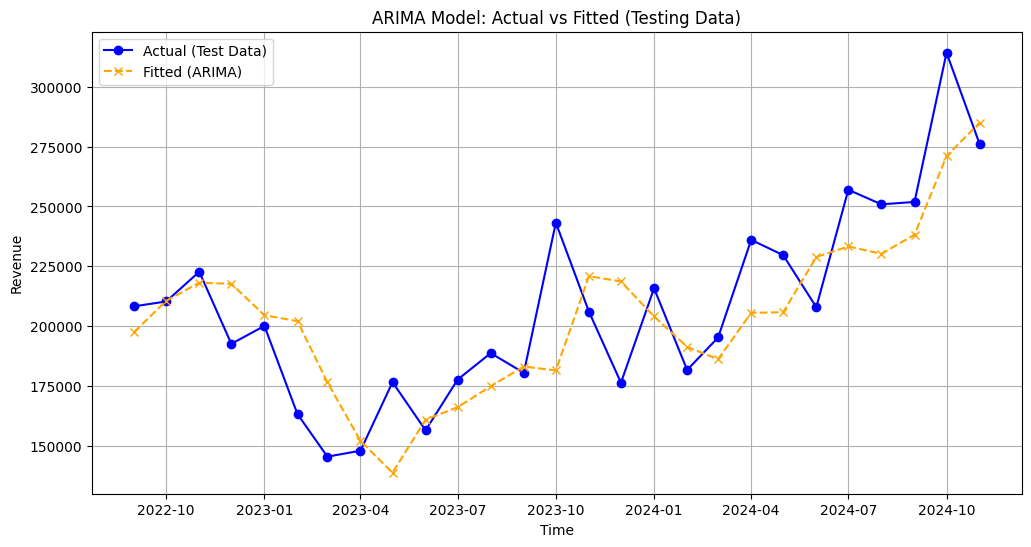

In [11]:
# 假設以下是你的數據和模型
# 訓練數據實際值
actual_test = test_data['revenue']

# 創建 DataFrame 比較實際值和擬合值
comparison = pd.DataFrame({'Actual': actual_test, 'Fitted': predictions}, index=test_data.index)

# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(comparison.index, comparison['Actual'], label='Actual (Test Data)', color='blue', marker='o')
plt.plot(comparison.index, comparison['Fitted'], label='Fitted (ARIMA)', color='orange', linestyle='--', marker='x')
plt.title('ARIMA Model: Actual vs Fitted (Testing Data)')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# 實際值和擬合值
actual = actual_test
fitted = pd.Series(predictions, index=actual.index)

# 計算 RMSE
rmse = np.sqrt(mean_squared_error(actual, fitted))

# 計算 MAE
mae = mean_absolute_error(actual, fitted)

# 計算 MAPE
mape = np.mean(np.abs((actual - fitted) / actual)) * 100

# 輸出結果
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

df_concat_test = pd.concat([actual, fitted], axis=1)
df_concat_test.columns = ['revenue', 'predicted_mean']
print(df_concat_test)

RMSE: 24544.37
MAE: 19426.98
MAPE: 9.46%
             revenue  predicted_mean
time                                
2022-09-01  208248.0   197532.898379
2022-10-01  210266.0   210548.390823
2022-11-01  222706.0   218088.081253
2022-12-01  192560.0   217654.802244
2023-01-01  200051.0   204526.895095
2023-02-01  163174.0   202041.856205
2023-03-01  145408.0   176477.893855
2023-04-01  147900.0   151990.928373
2023-05-01  176537.0   138691.142534
2023-06-01  156404.0   160855.838020
2023-07-01  177616.0   166071.386746
2023-08-01  188686.0   174833.835058
2023-09-01  180430.0   183086.490194
2023-10-01  243203.0   181448.784492
2023-11-01  206026.0   220858.913318
2023-12-01  176300.0   218630.816160
2024-01-01  215785.0   204006.626455
2024-02-01  181648.0   191263.773223
2024-03-01  195211.0   186131.114625
2024-04-01  236021.0   205507.675811
2024-05-01  229620.0   205787.889424
2024-06-01  207869.0   228840.082119
2024-07-01  256953.0   233264.872884
2024-08-01  250866.0   230188.2413

In [13]:
df_concat_test.to_csv('ARIMA_TEST.csv', header=True)

from google.colab import files
files.download('ARIMA_TEST.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# 將prediction重新
# 假設有 predictions (list 或 array)，長度是 N
N = len(predictions)

# 建立每日遞增的日期索引，從 2022-09-01 開始，共 N 筆
date_index = pd.date_range(start="2022-09-01", periods=N, freq="MS")

# 建立 DataFrame，指定剛剛的日期索引
prediction_test = pd.DataFrame(predictions, index=date_index, columns=['revenue'])

print(prediction_test, test_data)

                  revenue
2022-09-01  197532.898379
2022-10-01  210548.390823
2022-11-01  218088.081253
2022-12-01  217654.802244
2023-01-01  204526.895095
2023-02-01  202041.856205
2023-03-01  176477.893855
2023-04-01  151990.928373
2023-05-01  138691.142534
2023-06-01  160855.838020
2023-07-01  166071.386746
2023-08-01  174833.835058
2023-09-01  183086.490194
2023-10-01  181448.784492
2023-11-01  220858.913318
2023-12-01  218630.816160
2024-01-01  204006.626455
2024-02-01  191263.773223
2024-03-01  186131.114625
2024-04-01  205507.675811
2024-05-01  205787.889424
2024-06-01  228840.082119
2024-07-01  233264.872884
2024-08-01  230188.241330
2024-09-01  238161.430872
2024-10-01  271027.036806
2024-11-01  285021.896380              revenue
time                
2022-09-01  208248.0
2022-10-01  210266.0
2022-11-01  222706.0
2022-12-01  192560.0
2023-01-01  200051.0
2023-02-01  163174.0
2023-03-01  145408.0
2023-04-01  147900.0
2023-05-01  176537.0
2023-06-01  156404.0
2023-07-01  177616.0

In [15]:
#測試殘差
residuals_test = test_data - prediction_test
residuals_test
print(residuals_test)

                 revenue
time                    
2022-09-01  10715.101621
2022-10-01   -282.390823
2022-11-01   4617.918747
2022-12-01 -25094.802244
2023-01-01  -4475.895095
2023-02-01 -38867.856205
2023-03-01 -31069.893855
2023-04-01  -4090.928373
2023-05-01  37845.857466
2023-06-01  -4451.838020
2023-07-01  11544.613254
2023-08-01  13852.164942
2023-09-01  -2656.490194
2023-10-01  61754.215508
2023-11-01 -14832.913318
2023-12-01 -42330.816160
2024-01-01  11778.373545
2024-02-01  -9615.773223
2024-03-01   9079.885375
2024-04-01  30513.324189
2024-05-01  23832.110576
2024-06-01 -20971.082119
2024-07-01  23688.127116
2024-08-01  20677.758670
2024-09-01  13711.569128
2024-10-01  43212.963194
2024-11-01  -8963.896380


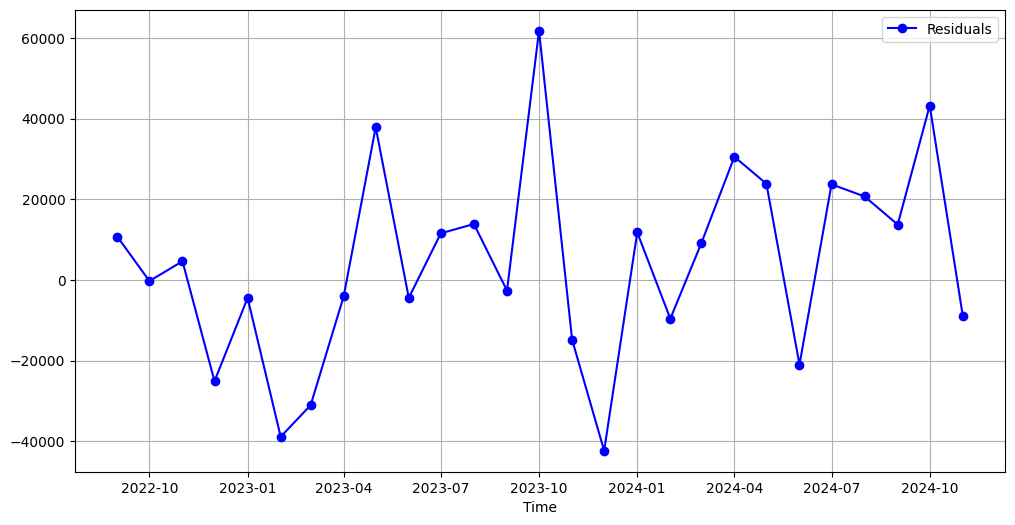

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(residuals_test, label='Residuals', color='blue', marker='o')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.show()

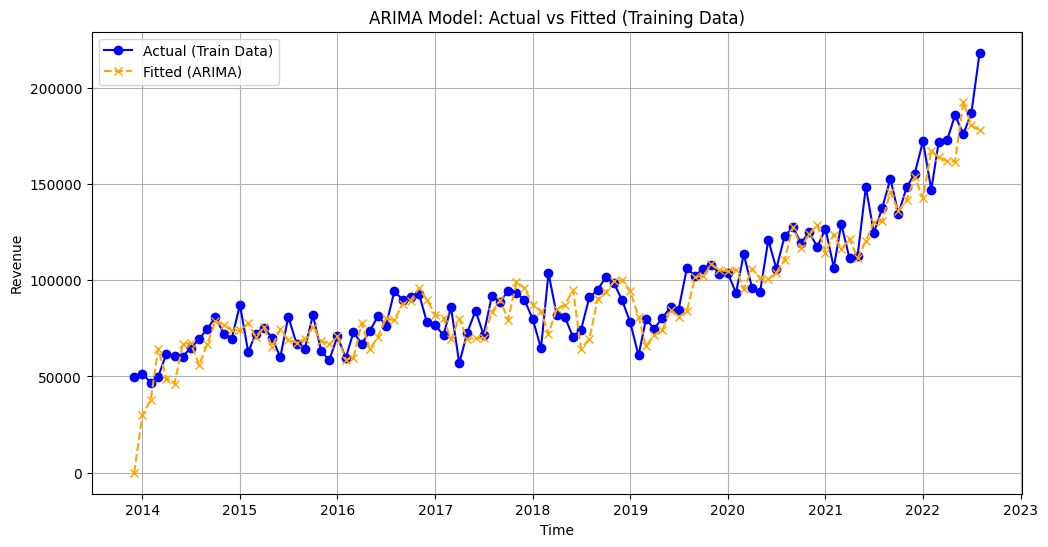

In [17]:

actual_train = train_data['revenue']
# 模擬值（ARIMA 模型對訓練數據的擬合值）
fitted_values_train = model_fit.predict(start=0, end=len(train_data)-1)

# 創建 DataFrame 比較實際值和擬合值
comparison = pd.DataFrame({'Actual': actual_train, 'Fitted': fitted_values_train}, index=train_data.index)

# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(comparison.index, comparison['Actual'], label='Actual (Train Data)', color='blue', marker='o')
plt.plot(comparison.index, comparison['Fitted'], label='Fitted (ARIMA)', color='orange', linestyle='--', marker='x')
plt.title('ARIMA Model: Actual vs Fitted (Training Data)')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
print(len(train_data),fitted_values_train )

105 [     0.          30185.75135268  37736.23674908  64449.81423508
  48770.79830284  46333.24171782  66884.5626577   67303.87900327
  55925.28980677  66801.66008778  78691.45722754  76907.13639411
  73869.76349615  73931.07812326  77583.79914648  70612.11761716
  75514.98761095  65487.03577741  74472.95608177  69028.83421806
  67522.80226522  69232.80743864  75728.43775129  68481.96221212
  66656.45440538  70818.58602027  58656.9398405   59675.59678902
  77793.24709382  64061.05995482  70651.05133588  80230.35148038
  79192.40753116  87674.58488747  89441.60305075  95825.1121984
  89757.60858717  82170.08362768  80247.40868561  69333.05035386
  80064.0169805   69486.4558276   69788.60770947  70044.99971239
  83260.04053742  89642.68338023  79516.7079442   98920.24890839
  95997.4153078   87209.10598064  83909.54982025  72169.68009689
  85115.68338505  87064.66628523  94906.66057065  64361.85384543
  69217.21612009  90232.0283756   93715.7362031   99319.89102015
 100167.18522402  9431

In [19]:
fitted_train = pd.Series(fitted_values_train, index=train_data.index)
print(fitted_train)

time
2013-12-01         0.000000
2014-01-01     30185.751353
2014-02-01     37736.236749
2014-03-01     64449.814235
2014-04-01     48770.798303
                  ...      
2022-04-01    161845.408250
2022-05-01    161593.587066
2022-06-01    192447.766642
2022-07-01    180569.383890
2022-08-01    177869.081160
Length: 105, dtype: float64


In [20]:
combined = pd.concat([train_data,fitted_train ], axis=1)

# 設定欄位名稱
combined.columns = ['revenue', 'predicted_mean']
df_concat_train = combined[1:]
print(df_concat_train)

             revenue  predicted_mean
time                                
2014-01-01   51430.0    30185.751353
2014-02-01   46829.0    37736.236749
2014-03-01   49956.0    64449.814235
2014-04-01   61887.0    48770.798303
2014-05-01   60789.0    46333.241718
...              ...             ...
2022-04-01  172561.0   161845.408250
2022-05-01  185705.0   161593.587066
2022-06-01  175874.0   192447.766642
2022-07-01  186763.0   180569.383890
2022-08-01  218132.0   177869.081160

[104 rows x 2 columns]


In [21]:
df_concat_train.to_csv('ARIMA_TRAIN.csv', header=True)

from google.colab import files
files.download('ARIMA_TRAIN.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
#訓練殘差
residuals_train = actual_train - fitted_train
residuals_train = residuals_train[1:]
N = len(residuals_train)
date_index = pd.date_range(start="2014-01-01", periods=N, freq="MS")
residuals_train = pd.DataFrame(residuals_train, index=date_index, columns=['revenue'])
print(residuals_train)

                 revenue
2014-01-01  21244.248647
2014-02-01   9092.763251
2014-03-01 -14493.814235
2014-04-01  13116.201697
2014-05-01  14455.758282
...                  ...
2022-04-01  10715.591750
2022-05-01  24111.412934
2022-06-01 -16573.766642
2022-07-01   6193.616110
2022-08-01  40262.918840

[104 rows x 1 columns]


In [23]:
print(residuals_train)
print(residuals_test)
print(type(residuals_test))
print(type(residuals_train))

                 revenue
2014-01-01  21244.248647
2014-02-01   9092.763251
2014-03-01 -14493.814235
2014-04-01  13116.201697
2014-05-01  14455.758282
...                  ...
2022-04-01  10715.591750
2022-05-01  24111.412934
2022-06-01 -16573.766642
2022-07-01   6193.616110
2022-08-01  40262.918840

[104 rows x 1 columns]
                 revenue
time                    
2022-09-01  10715.101621
2022-10-01   -282.390823
2022-11-01   4617.918747
2022-12-01 -25094.802244
2023-01-01  -4475.895095
2023-02-01 -38867.856205
2023-03-01 -31069.893855
2023-04-01  -4090.928373
2023-05-01  37845.857466
2023-06-01  -4451.838020
2023-07-01  11544.613254
2023-08-01  13852.164942
2023-09-01  -2656.490194
2023-10-01  61754.215508
2023-11-01 -14832.913318
2023-12-01 -42330.816160
2024-01-01  11778.373545
2024-02-01  -9615.773223
2024-03-01   9079.885375
2024-04-01  30513.324189
2024-05-01  23832.110576
2024-06-01 -20971.082119
2024-07-01  23688.127116
2024-08-01  20677.758670
2024-09-01  13711.569128
2

In [24]:


# 將兩個 Series 依照索引排序後縱向合併
residuals_all = pd.concat([residuals_train, residuals_test], axis=0)

# 檢查結果
print(residuals_all)
print(len(residuals_all))



                 revenue
2014-01-01  21244.248647
2014-02-01   9092.763251
2014-03-01 -14493.814235
2014-04-01  13116.201697
2014-05-01  14455.758282
...                  ...
2024-07-01  23688.127116
2024-08-01  20677.758670
2024-09-01  13711.569128
2024-10-01  43212.963194
2024-11-01  -8963.896380

[131 rows x 1 columns]
131


In [25]:
# 將 Series 輸出為 CSV 檔案
residuals_all.name = 'residual'
residuals_all.to_csv('residuals_all.csv', header=True)

from google.colab import files
files.download('residuals_all.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>